In [1]:
import numpy
import random
import itertools
import pickle
import seaborn
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#### parameters
num_trials = 3
num_categories = 388
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]

params1 = [1, 50, 100, 150, 200, 250, 300, 350, 388] # number of transformed categories
params2 = ['blur', 'scale', 'quantization'] # transformation types
params_comb = [p for p in itertools.product(params1, params2)]

In [3]:
#### load data
blur_accuracies = numpy.empty((len(params1), num_trials, 9, 2)) # transformed, nontransformed
scale_accuracies = numpy.empty((len(params1), num_trials, 10, 2))
quantization_accuracies = numpy.empty((len(params1), num_trials, 10, 2))
for i, p in enumerate(params_comb):
    for t in range(num_trials):
        random.seed(t+1) # seed fixed
        category_orders = [i for i in range(num_categories)]
        random.shuffle(category_orders)
        num_category_transformed, transformation_type = p[0], p[1]
        with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v1/id{}_t{}/analysis_v1_accuracy_within_across_category.pickle'.format(i+1, t+1), 'rb') as f:
            data = pickle.load(f)

        if transformation_type == 'blur':
            # blur_accuracies[params1.index(num_category_transformed), t, :, 0] = \
            #     numpy.mean(data['correct1'][:, numpy.where(data['is_transformed'])[0]], axis=1)
            # blur_accuracies[params1.index(num_category_transformed), t, :, 1] = \
            #     numpy.mean(data['correct1'][:, numpy.where(numpy.invert(data['is_transformed']))[0]], axis=1)
            blur_accuracies[params1.index(num_category_transformed), t, :, 0] = data['accuracy1_within']
            blur_accuracies[params1.index(num_category_transformed), t, :, 1] = data['accuracy1_across']

        elif transformation_type == 'scale':
            # scale_accuracies[params1.index(num_category_transformed), t, :, 0] = \
            #     numpy.mean(data['correct1'][:, numpy.where(data['is_transformed'])[0]], axis=1)
            # scale_accuracies[params1.index(num_category_transformed), t, :, 1] = \
            #     numpy.mean(data['correct1'][:, numpy.where(numpy.invert(data['is_transformed']))[0]], axis=1)
            scale_accuracies[params1.index(num_category_transformed), t, :, 0] = data['accuracy1_within']
            scale_accuracies[params1.index(num_category_transformed), t, :, 1] = data['accuracy1_across']

        elif transformation_type == 'quantization':
            # quantization_accuracies[params1.index(num_category_transformed), t, :, 0] = \
            #     numpy.mean(data['correct1'][:, numpy.where(data['is_transformed'])[0]], axis=1)
            # quantization_accuracies[params1.index(num_category_transformed), t, :, 1] = \
            #     numpy.mean(data['correct1'][:, numpy.where(numpy.invert(data['is_transformed']))[0]], axis=1)
            quantization_accuracies[params1.index(num_category_transformed), t, :, 0] = data['accuracy1_within']
            quantization_accuracies[params1.index(num_category_transformed), t, :, 1] = data['accuracy1_across']


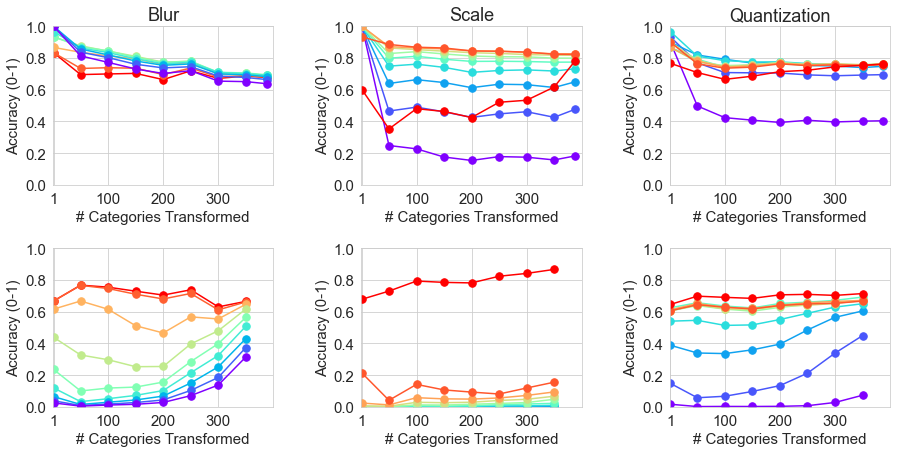

In [4]:
#### visualize
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = '15'

#### blur
for i in range(2):
    plt.subplot(2,3, 3*i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    colors = cm.rainbow(numpy.linspace(1, 0, 9))
    for j in range(9):
        if i == 0:
            plt.plot(params1, numpy.mean(blur_accuracies[:,:,j,i], axis=1), '.-', markersize=15, color=colors[j])
        elif i == 1:
            plt.plot(params1[:-1], numpy.mean(blur_accuracies[:-1,:,j,i], axis=1), '.-', markersize=15, color=colors[j])

    plt.xlabel('# Categories Transformed')
    plt.ylabel('Accuracy (0-1)')
    plt.xticks([1, 100, 200, 300])
    plt.xlim([0,400])
    plt.ylim(0,1)

    if i == 0:
        plt.title('Blur')

#### scale
for i in range(2):
    plt.subplot(2,3, 3*i+2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    colors = cm.rainbow(numpy.linspace(0, 1, 10))
    for j in range(10):
        if i == 0:
            plt.plot(params1, numpy.mean(scale_accuracies[:,:,j,i], axis=1), '.-', markersize=15, color=colors[j])
        elif i == 1:
            plt.plot(params1[:-1], numpy.mean(scale_accuracies[:-1,:,j,i], axis=1), '.-', markersize=15, color=colors[j])

    plt.xlabel('# Categories Transformed')
    plt.ylabel('Accuracy (0-1)')
    plt.xticks([1, 100, 200, 300])
    plt.xlim([0,400])
    plt.ylim(0,1)

    if i == 0:
        plt.title('Scale')

#### quantization
for i in range(2):
    plt.subplot(2,3, 3*i+3)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    colors = cm.rainbow(numpy.linspace(0, 1, 10))
    for j in range(10):
        if i == 0:
            plt.plot(params1, numpy.mean(quantization_accuracies[:,:,j,i], axis=1), '.-', markersize=15, color=colors[j])
        elif i == 1:
            plt.plot(params1[:-1], numpy.mean(quantization_accuracies[:-1,:,j,i], axis=1), '.-', markersize=15, color=colors[j])

    plt.xlabel('# Categories Transformed')
    plt.ylabel('Accuracy (0-1)')
    plt.xticks([1, 100, 200, 300])
    plt.xlim([0,400])
    plt.ylim(0,1)

    if i == 0:
        plt.title('Quantization')